# Challenge
1. Perform basic signal processing methods (e.g., filters, transforms, etc.) on the provided EEG data from a seizure patient
1. Display visualizations of how these processes affected the data
1. Apply statistical measures to show how seizure and non-seizure data differentiate (e.g., range of data during seizure event vs range of data during non-seizure times)
1. Display visualizations of the statistical measures and how any of the above processes affected these measures

         µV
0  38.96277
1  40.32998
2  38.96277
3  38.27916
4  41.69719


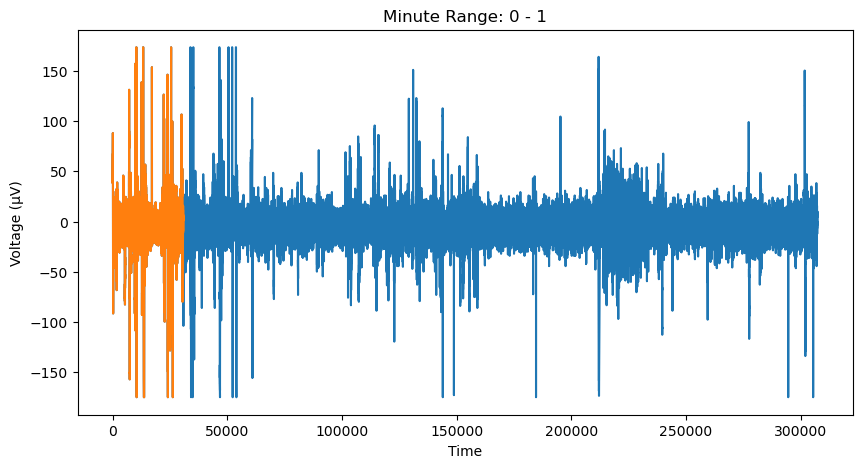

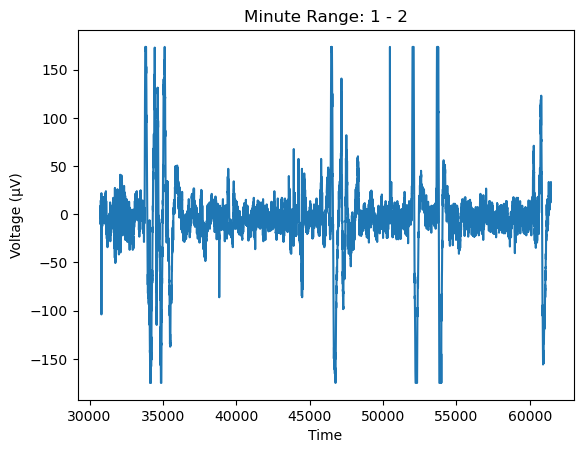

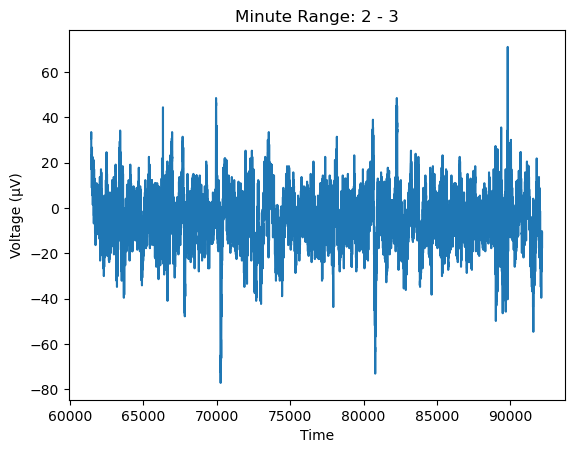

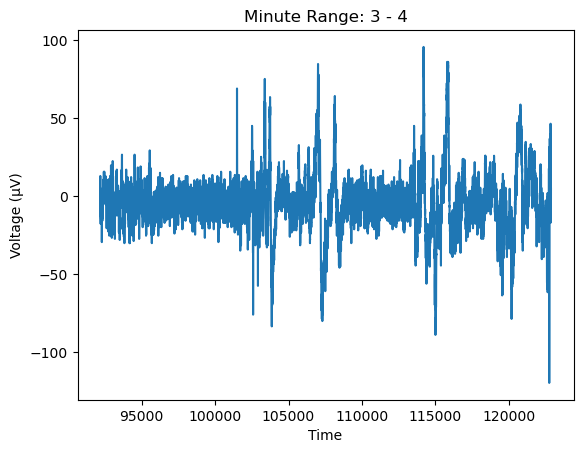

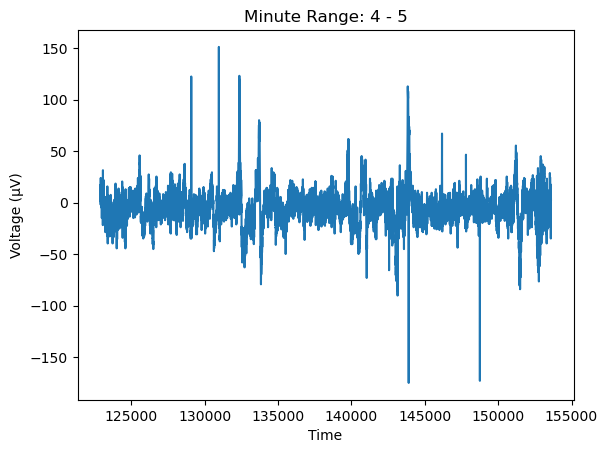

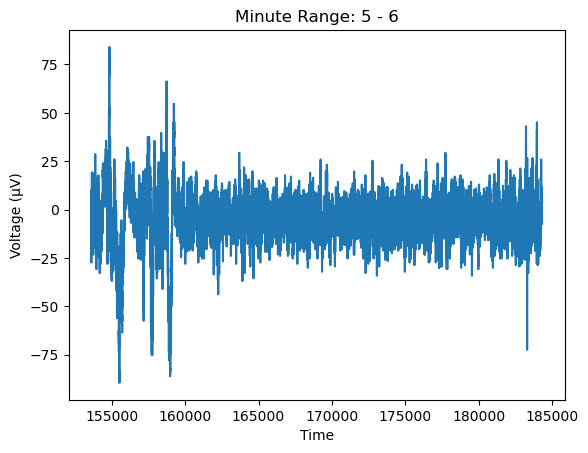

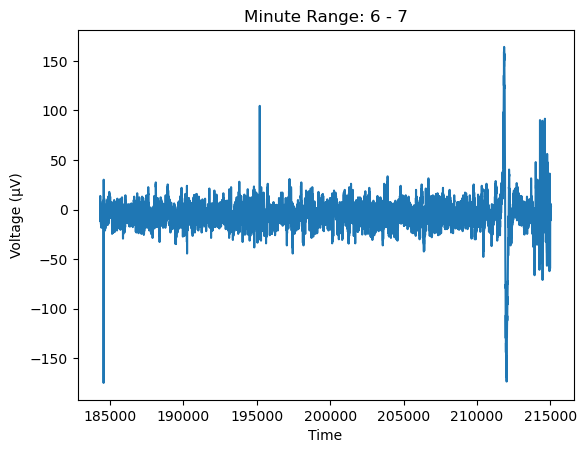

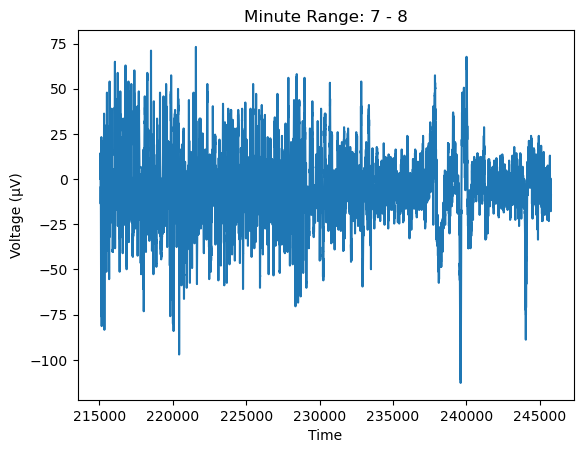

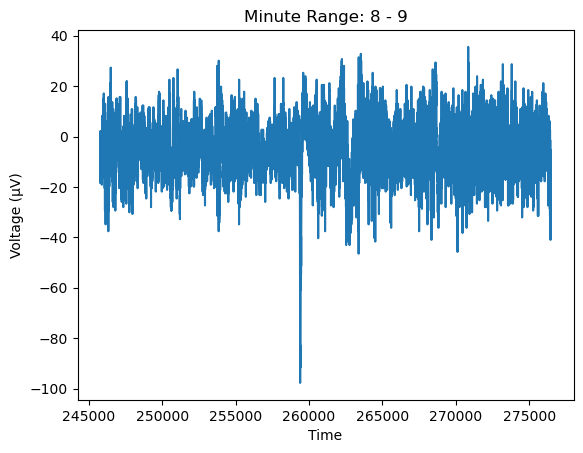

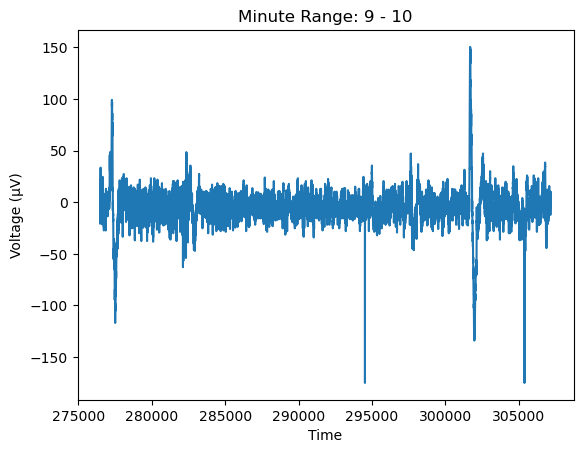

In [1]:
# Import frameworks 
import pandas as pd 
import numpy as np 
import mne 
import matplotlib.pyplot as plt 
import scipy


# Configure data into a data frame, visualize raw data
raw = pd.read_csv("data.csv", names= ['µV'])
print(raw.head())


# Plot data 
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title("Raw Data")
ax.set_xlabel("Time")
ax.set_ylabel("Voltage (µV)")
lines = ax.plot(raw.index, raw['µV'])

# Segment data into 1 minute time intervals and graph 

raw_split = np.split(raw,10)
min_count = 1

for i in raw_split: 
    plt.plot(i)
    plt.title(f"Minute Range: {(min_count-1)} - {min_count}")
    plt.xlabel("Time")
    plt.ylabel("Voltage (µV)")
    plt.show()
    min_count += 1


# Unsure why the first graph looks different, but I'm going to move on and come back to it

In [2]:
# First determine the mean for each interval
means = []
for i in raw_split: 
    means.append(np.mean(i['µV']))

print(means)

[-4.532867891276087, -4.437528070312462, -4.395648160481815, -4.229176588867275, -4.593923522461001, -4.457189327148518, -4.457437036783953, -4.444768941731871, -4.5246093636068165, -4.485227262369878]


The means of each data set seem to be very similar. I think I should divide the data up further into segments of 30 second segments (~length of the seizure) and compare those intervals instead.

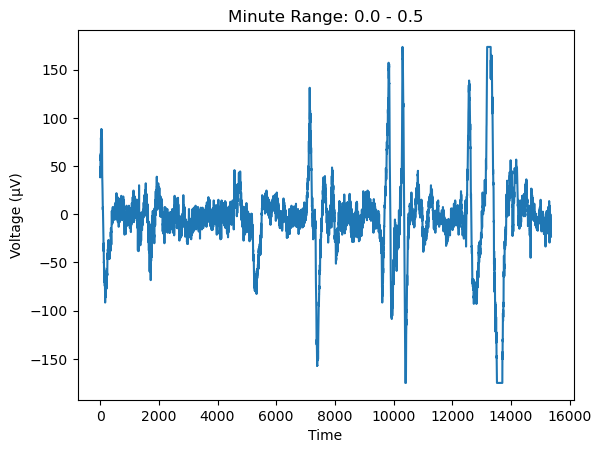

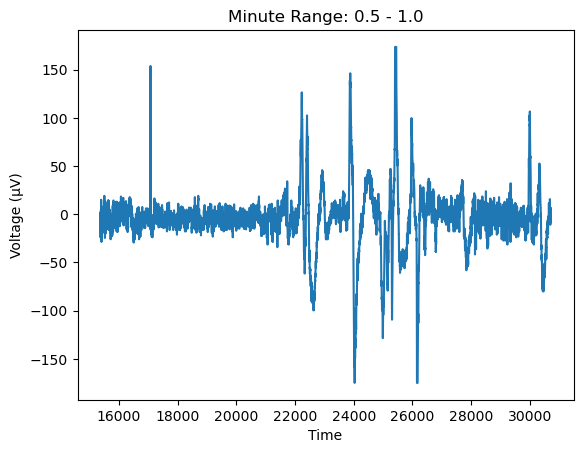

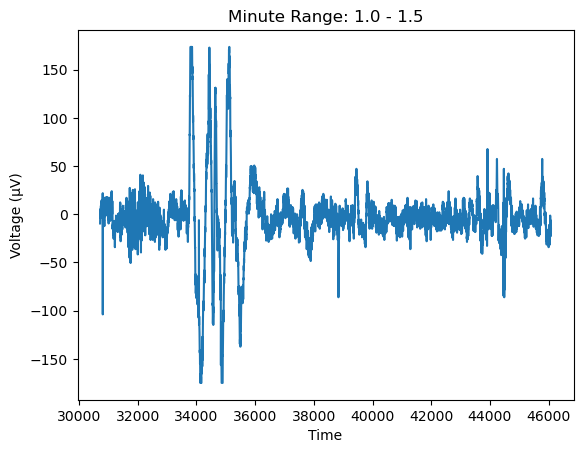

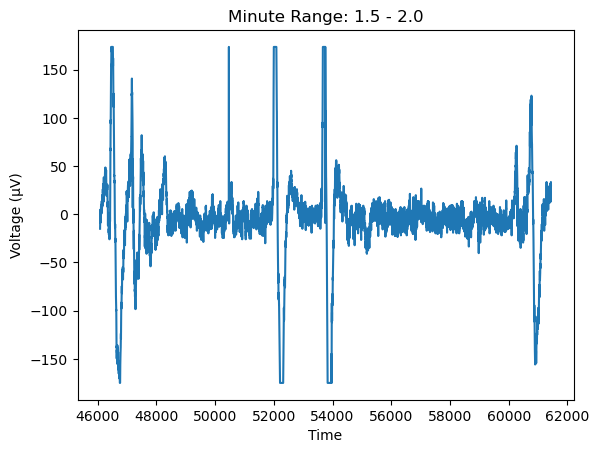

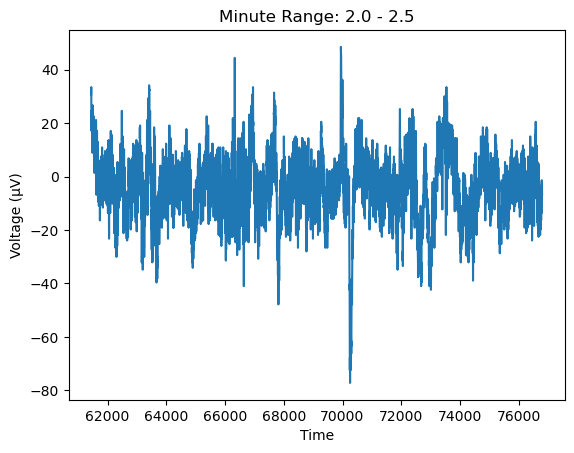

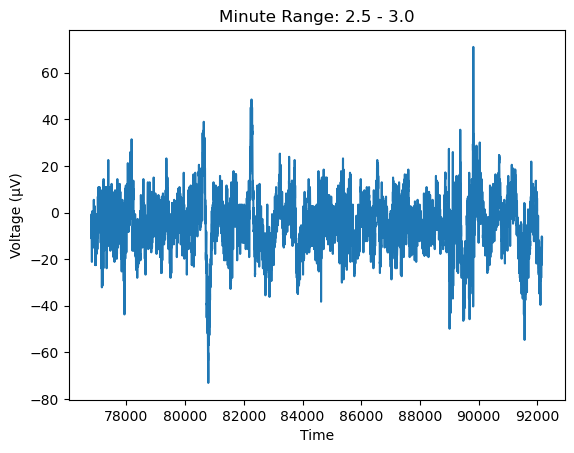

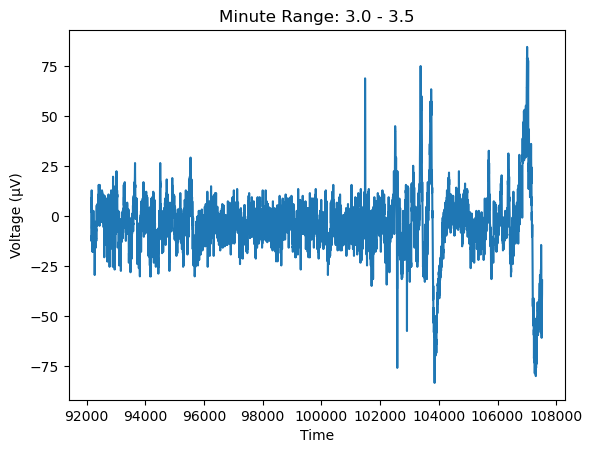

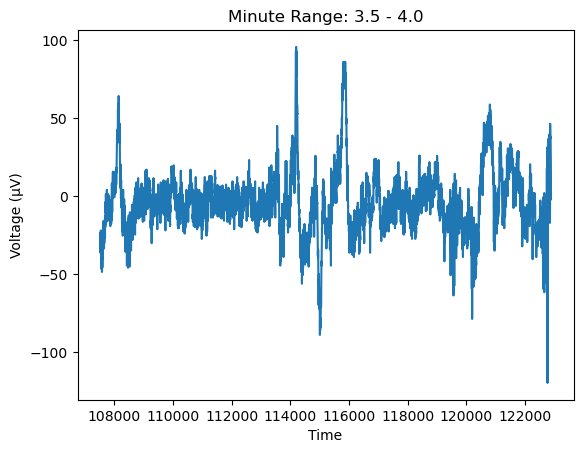

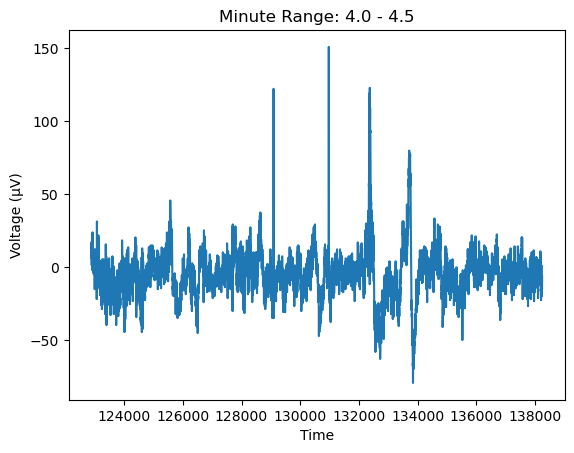

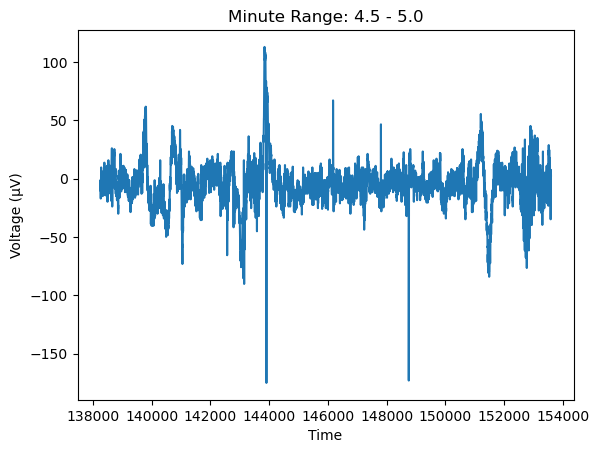

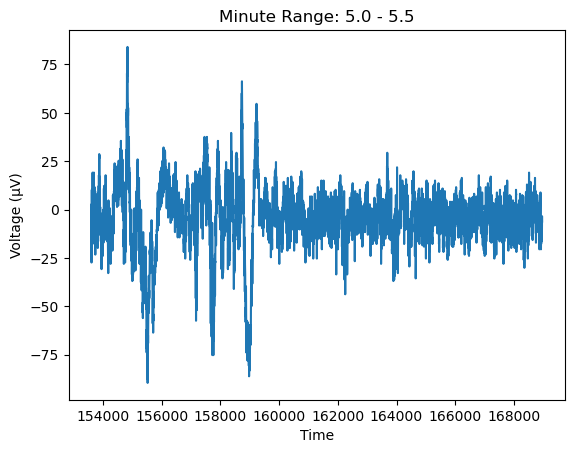

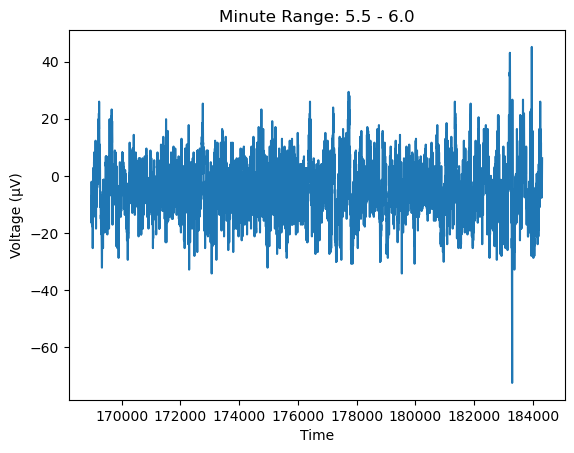

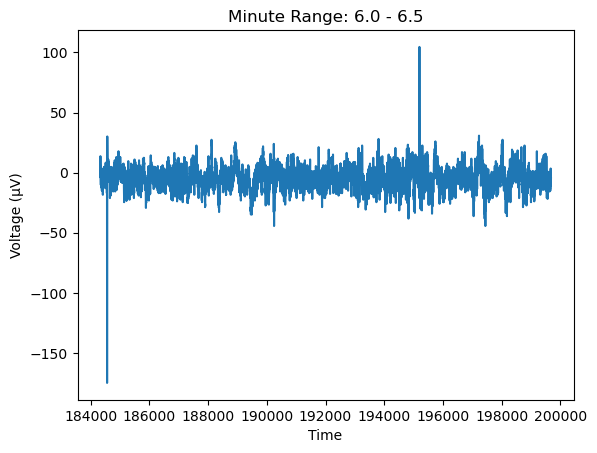

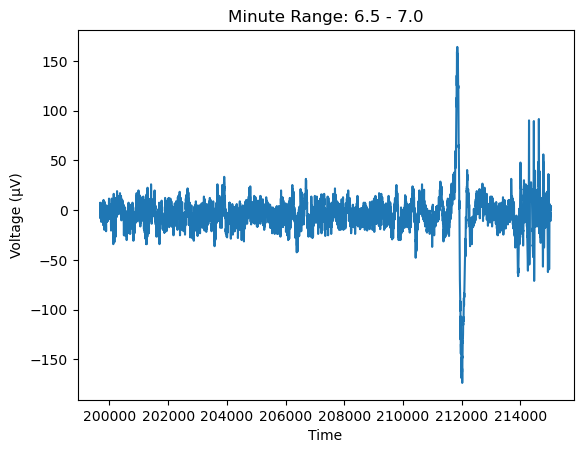

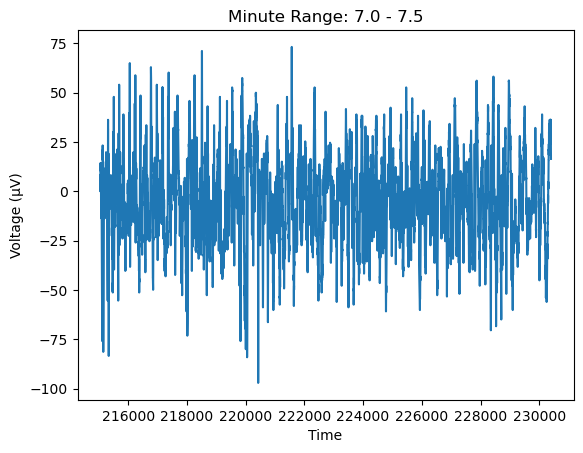

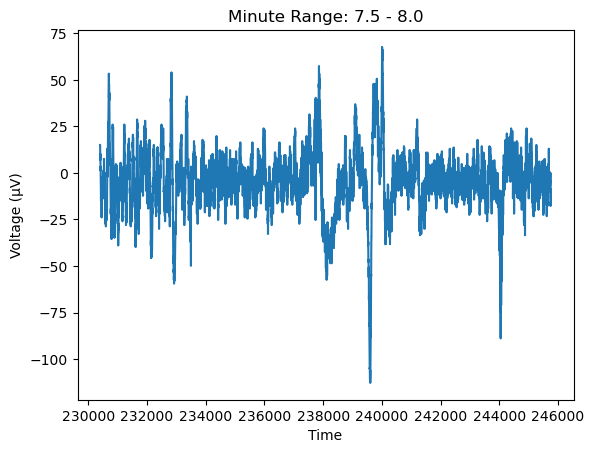

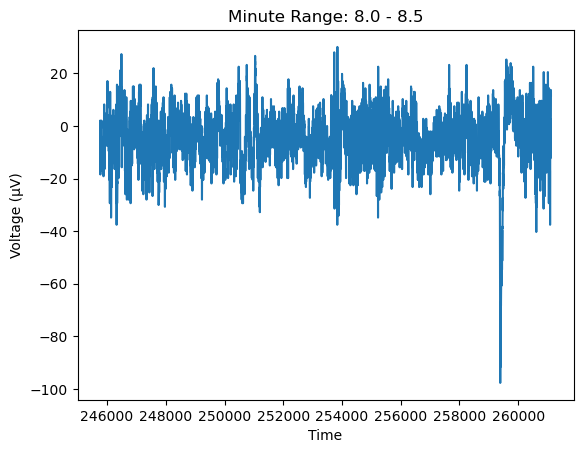

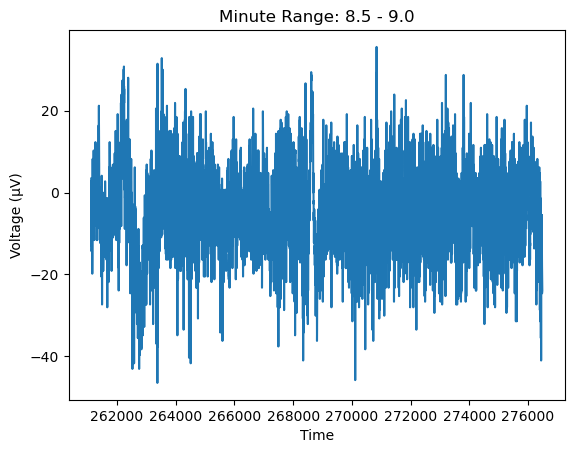

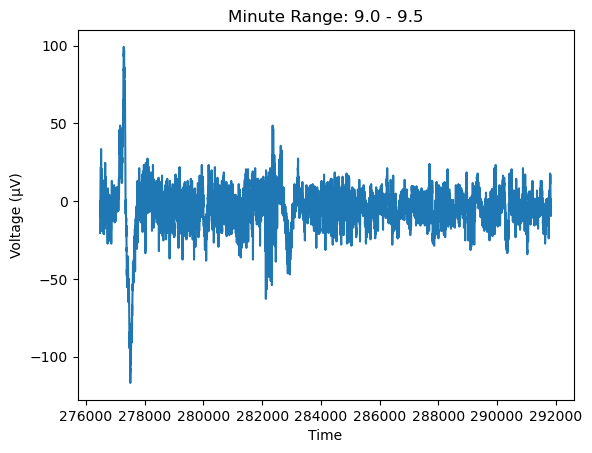

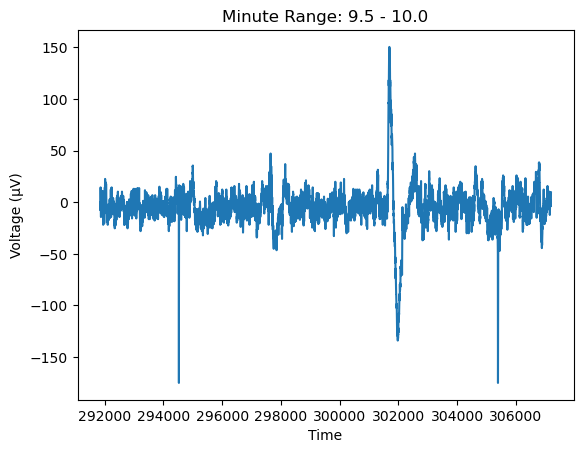

In [3]:
raw_split_halfmin = np.split(raw,20)
min_count = 0.5

for i in raw_split_halfmin: 
    plt.plot(i)
    plt.title(f"Minute Range: {(min_count-0.5)} - {min_count}")
    plt.xlabel("Time")
    plt.ylabel("Voltage (µV)")
    plt.show()
    min_count += .5

In [4]:
# Compare means 
means = []
for i in raw_split: 
    means.append(np.mean(i['µV']))

The average voltage values for each interval still seem similar, however I am going to perform a t-test on the data anyway to confirm whether there is a difference or not difference. 


Null Hypothesis: There is no difference in the signal between intervals
    - Accept when p-value > 0.05
    - Reject when p-value < 0.05

In [5]:
for interval in raw_split_halfmin: 
    ttest = scipy.stats.ttest_ind(interval, raw_split_halfmin[14])
    print(ttest)

Ttest_indResult(statistic=array([-0.51295644]), pvalue=array([0.60798548]))
Ttest_indResult(statistic=array([-0.30164424]), pvalue=array([0.76292532]))
Ttest_indResult(statistic=array([0.50092502]), pvalue=array([0.61642748]))
Ttest_indResult(statistic=array([-0.66935442]), pvalue=array([0.50327445]))
Ttest_indResult(statistic=array([0.8920804]), pvalue=array([0.37235683]))
Ttest_indResult(statistic=array([-0.9906741]), pvalue=array([0.32185254]))
Ttest_indResult(statistic=array([0.61875244]), pvalue=array([0.53608404]))
Ttest_indResult(statistic=array([0.72287287]), pvalue=array([0.46976349]))
Ttest_indResult(statistic=array([-1.61971642]), pvalue=array([0.10530347]))
Ttest_indResult(statistic=array([-0.21034736]), pvalue=array([0.83339797]))
Ttest_indResult(statistic=array([-0.24984391]), pvalue=array([0.80270973]))
Ttest_indResult(statistic=array([-0.42531751]), pvalue=array([0.67060821]))
Ttest_indResult(statistic=array([-0.83098875]), pvalue=array([0.40598644]))
Ttest_indResult(st

The p-values for each comparison (except the one comparing instead haha) are greater than 0.05, meaning we accept the null hypothesis in all cases. This means that the signal during the seizure is the same as the other interval's signals. 

This intuitively does not make sense to me. I would assume that the signal during the interval of the seizure would be statistically different. The data vizualizations clearly shows that the seizure interval has more activty present. 

This makes me believe on of two things: a t-test is not the correct statistical comparison test to perform on this data OR I must filter the data into a more specific frequency range than 0.3-92 Hz. 